In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#make data points
from sklearn.datasets import make_regression

In [19]:
X,y = make_regression(n_samples=1000, n_features=2,n_targets=1, noise=3.0)

In [20]:
X

array([[ 0.16362599,  0.98590982],
       [-1.07264254, -0.37827519],
       [ 0.20790637,  0.42808987],
       ...,
       [-1.24834272,  1.24000551],
       [ 1.02742872,  1.20906346],
       [ 0.66638399,  0.96212783]])

In [21]:
y

array([ 2.32902939e+01, -5.83277760e+01,  1.38538492e+01, -7.50098415e+00,
       -7.87282140e+01, -4.66822226e+01,  4.06610793e+01,  6.40079811e+01,
       -8.38831466e+01, -5.91501404e+01,  1.59672125e+01,  4.09262748e+00,
       -8.55894170e+01, -1.35018500e+01, -2.48030327e+01,  7.55677117e+01,
       -7.74439844e+01, -1.61813709e+01, -6.25418638e+00, -2.83478271e+01,
        7.27152699e+01,  2.15628818e+01,  4.30134494e+01, -4.03755869e+01,
        4.40948680e+01, -6.00421952e+00, -7.58845753e+01,  9.49174756e+01,
        9.00517262e+01,  7.22119907e+01, -2.46461194e+01, -2.11566861e+01,
       -7.54905626e+01,  1.81530985e+01, -3.59375818e+01,  5.60608727e+01,
       -6.51845245e+01, -3.41046673e+00,  1.02004981e+01,  6.15966923e+01,
        3.26526161e+01, -3.34900438e+01, -6.42255389e+01, -4.27484099e+01,
       -2.52011869e+01, -1.39693394e+01,  1.04838016e+02, -8.86748158e+01,
       -2.02861185e+01, -2.34816602e+00,  7.17058964e+01, -6.26552766e+01,
       -7.94284979e+00, -

In [22]:
pd.DataFrame(X)[0]

0      0.163626
1     -1.072643
2      0.207906
3     -0.424686
4     -1.184162
         ...   
995    0.674364
996   -0.524244
997   -1.248343
998    1.027429
999    0.666384
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

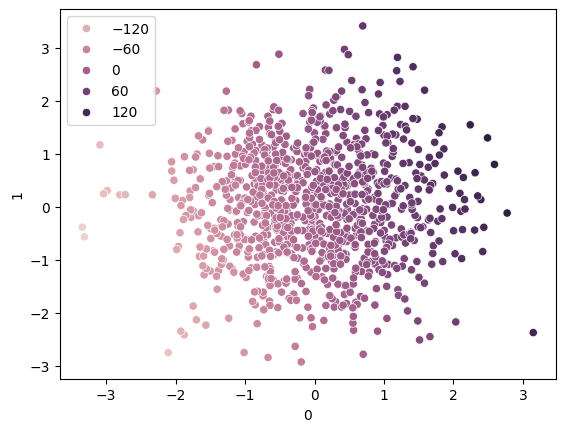

In [23]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [25]:
from sklearn.svm import SVR

In [26]:
svr = SVR(kernel='linear')

In [27]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [29]:
svr.coef_

array([[50.73808335, 14.63033823]])

In [30]:
y_pred = svr.predict(X_test)

In [34]:
from sklearn.metrics import r2_score

In [36]:
print(r2_score(y_test,y_pred))

0.9966732480974987


Hyperparameter Tuning with SVR

In [41]:
from sklearn.model_selection import GridSearchCV

#defining parameter range
param_grid ={'C':[0.1,1,10,100,1000],
             'gamma':[1,0.1,0.01,0.001,0.0001],
             'kernel':['linear'],
             'epsilon':[0.1,0.2,0.3]
             }

In [42]:
grid = GridSearchCV(SVR(),param_grid,refit =True,cv=5,verbose=3)

In [43]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.971 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.973 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.969 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.969 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.971 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.971 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.973 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.969 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.969 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.971 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [44]:
grid.best_params_

{'C': 10, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [46]:
#prediction
y_predict_ = grid.predict(X_test)
print(r2_score(y_test,y_pred))

0.9966732480974987
